# Lab2 IGR Visualization

## Reporter:  Kovaleva Maria

## Task
Visualize (using interactive plots) convergence of invertible gaussian reparametrization (IGR). Optimize KL(q|p) -> min, where q and p are IGR, the parameters of IGR are sampled randomly each run. Plot: simplex (triangle) with PDF changes during optimization.

## Theory


### The reparameterization trick

Many problems in machine learning can be formulated as optimizing parameters of a distribution over an expectation:
\begin{equation}
\phi^* = argmax_{\phi} L(\phi) := argmax_\phi \mathbb{E}_{q_\phi(z)}[f(z)]
\end{equation}
where $q_\phi$ is a distribution over $\mathcal{S}$ parameterized by $\phi$ and $f: \mathcal{S}
\rightarrow \mathbb{R}$. 

In order to use stochastic gradient methods, the gradient of $L$ has to be estimated. 
A first option is to use score estimators. 
However, in practice score estimators usually exhibit high variance. 
The reparameterization trick provides an alternative estimate of this gradient which empirically has less
variance, resulting in more efficient optimization. The reparameterization trick consists of finding a function $g(\epsilon, \phi)$ such that $g$ is differentiable with respect to $\phi$ and if $z \sim q_\phi$, then:

\begin{equation}
 z =g(\epsilon, \phi)
\end{equation}
where $\epsilon$ is a continuous random variable whose distribution does not depend on $\phi$ and is
easy to sample from. The gradient is then estimated by:
\begin{equation}
 \nabla_\phi L(\phi) \approx \dfrac{1}{B} \displaystyle \sum_{b=1}^B \nabla_\phi f(g(\epsilon_b,
 \phi))
\end{equation}

where $\epsilon_1,\dots, \epsilon_B$ are iid samples from the distribution of $\epsilon$. 
For example, if $\phi=(\mu, \sigma)$ and $q_\phi = \mathcal{N}(\mu, \sigma^2)$ then the reparameterization trick is given by $g(\epsilon, \phi)=\mu + \sigma\epsilon$ with $\epsilon \sim \mathcal{N}(0,1)$.

### Continuous relaxations

While we can use score estimators whether $q_\phi$ has continuous or discrete support, the reparameterization gradient of previous equation is only valid when $q_\phi$ has continuous support. 
To extend the reparameterization trick to the discrete setting, thus avoiding the high variance issues of score estimators, suppose $q_\phi$ is a distribution over the set $\mathcal{S}=\{1,2,\dots, K\}$. 
We use one-hot representations of length $K$ for the elements of $\mathcal{S}$, so that $\mathcal{S}$ can be interpreted as the vertices of the $(K-1)$-simplex, $\Delta^{(K-1)}=\{z \in \mathbb{R}^K: z_k \geq 0 \text{ and }\sum_{k=1}^K z_k=1\}$.
The idea is to now place a continuous distribution over $\Delta^{(K-1)}$ that approximates $q_\phi$.
Note that placing a distribution over $\Delta^{(K-1)}$ is equivalent to placing a distribution over $\mathcal{S}^{(K-1)}=\{z \in \mathbb{R}^{K-1}: z_k > 0 \text{ and }\sum_{k=1}^{K-1} z_k < 1\}$, as the last coordinate can
be obtained from the previous ones: $z_K = 1-\sum_{k=1}^{K-1}z_k$. Placing a distribution over $\mathcal{S}^{(K-1)}$ is mathematically convenient as $\mathcal{S}^{(K-1)} \subset \mathbb{R}^{K-1}$ has positive Lebesgue measure, while $\Delta^{(K-1)} \subset \mathbb{R}^K$ does not. 
Although this distinction might appear as an irrelevant technicality, it allows us to correctly compute our Jacobians. 
We will thus interchangeably think of distributions over $\mathcal{S}$ as points in either $\mathcal{S}^{(K-1)}$ or $\Delta^{(K-1)}$. The optimization problem of the first equation is then relaxed to:

\begin{equation}
 \tilde{\phi}^* = argmax_{\tilde{\phi}} \tilde{L}(\tilde{\phi}) :=
 argmax_{\tilde{\phi}}\mathbb{E}_{\tilde{q}_{\tilde{\phi}}(\tilde{z})}[\tilde{f}(\tilde{z})]
\end{equation}

where $\tilde{q}_{\tilde{\phi}}$ is a distribution over $\mathcal{S}^{(K-1)}$ and the function
$\tilde{f}:\mathcal{S}^{(K-1)} \rightarrow \mathbb{R}$ is a relaxation of $f$ to
$\mathcal{S}^{(K-1)}$. As long as $\tilde{q}_{\tilde{\phi}}$ concentrates most of its mass around
$\mathcal{S}$ and $\tilde{f}$ is smooth, this relaxation is sensible. If $\tilde{q}_{\tilde{\phi}}$
can be reparameterized, then we can use the reparameterization trick.
We make two important notes: first, not only the distribution is relaxed, the function $f$ also has
to be relaxed to $\tilde{f}$ because it now needs to take inputs in $\mathcal{S}^{(K-1)}$ and not
just $\mathcal{S}$. In other words, the objective must also be relaxed, not just the distribution.
Second, the parameters $\tilde{\phi}$ of the relaxed distribution need not match the parameters
$\phi$ of the original distribution.

 
 ### IGR
 The IGR distribution on $\mathcal{S}^{(K-1)}$, which is parameterized by $(\mu, \sigma)$, where $\mu \in \mathbb{R}^{K-1}$ and
 $\sigma \in (0, \infty)^{K-1}$. Gaussian noise $\epsilon = (\epsilon_1,\dots, \epsilon_{K-1}) \sim
 \mathcal{N}(0, I_{K-1})$ is transformed in the following way:

 \begin{align}
 y & = \mu + \text{diag}(\sigma) \epsilon \\ \tilde{z} & = g(y, \tau)
 \end{align}
 
 where $\text{diag}(\sigma)$ is a diagonal matrix whose nonzero elements are given by $\sigma$,
 $g(\cdot, \tau)$ is an invertible smooth function and $\tau > 0$ is a temperature hyperparameter.
 The first advantage of choosing $g$ to be an invertible function
 is that the density of $\tilde{z}$ can be computed in closed form with the change of variable
 formula:

 \begin{equation}
 \tilde{q}_{\mu, \sigma, \tau}(\tilde{z}) = \mathcal{N}(y|\mu, \sigma)|\det J_{g}(y,
 \tau)|^{-1}
 \end{equation}

 where $J_{g}(\cdot, \tau)$ is the Jacobian of $g(\cdot, \tau)$. The second advantage of this choice
 is that it allows us to compute the $\mathbb{KL}$ in closed form (as the Jacobian terms cancel out
 in the ratio):
\begin{equation}
  \mathbb{KL}\left(\tilde{q}_{\mu, \sigma, \tau}(\tilde{z})||\tilde{q}_{\mu_0, \sigma_0, \tau}(\tilde{z})\right)
  =
  \mathbb{KL}\left(\mathcal{N}(\mu, \sigma^2)||\mathcal{N}(\mu_0, \sigma^2_0)\right)
\end{equation}


In [1]:
import numpy as np
from scipy.special import rel_entr

from ipywidgets import interact
import matplotlib.pyplot as plt

## KL divergence and it's derivative

KL divergence between two normal distributions.

$KL\left(\mathcal{N}(m_0,\Sigma_0)||\mathcal{N}(m_1,\Sigma_1)\right) = \frac{1}{2}\left( tr\left(\Sigma_1^{-1} \Sigma_0\right) + \left(\mu_1 - \mu_0\right)^T \Sigma_1^{-1} \left(\mu_1 - \mu_0\right) - k + \ln{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}}\right)$

We need to calculate its deriavative:

$\frac{\partial}{\partial \Sigma_1} \left(\mu_1 - \mu_0\right)^T \Sigma_1^{-1} \left(\mu_1 - \mu_0\right) = -\left(\Sigma_1^{-1}\right)^T \left(\mu_1 - \mu_0\right) \left(\mu_1 - \mu_0\right)^T \left(\Sigma_1^{-1}\right)^T$

$\frac{\partial}{\partial \Sigma_1} tr\left(\Sigma_1^{-1} \Sigma_0\right) = - \left(\Sigma_1^{-1} \Sigma_0\Sigma_1^{-1}\right)^T$

$\frac{\partial}{\partial \Sigma_1} \left(\ln{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}}\right) = \frac{1}{\det{\Sigma_1}}\frac{\partial}{\partial \Sigma_1} \det{\Sigma_1} = \left(\Sigma_1^{-1}\right)^T$

$\frac{\partial}{\partial \mu_1}\left(\mu_1 - \mu_0\right)^T \Sigma_1^{-1} \left(\mu_1 - \mu_0\right) = \left(\Sigma_1^{-1} + \left(\Sigma_1^{-1}\right)^T\right) \left(\mu_1 - \mu_0\right)$

And finaly:

$\frac{\partial}{\partial \mu_1}KL\left(\mathcal{N}(m_0,\Sigma_0)||\mathcal{N}(m_1,\Sigma_1)\right) = \frac{1}{2}\left(\Sigma_1^{-1} + \left(\Sigma_1^{-1}\right)^T\right) \left(\mu_1 - \mu_0\right)$

$\frac{\partial}{\partial \Sigma_1}KL\left(\mathcal{N}(m_0,\Sigma_0)||\mathcal{N}(m_1,\Sigma_1)\right)  = \frac{1}{2}\left(-\left(\Sigma_1^{-1}\right)^T \left(\mu_1 - \mu_0\right) \left(\mu_1 - \mu_0\right)^T \left(\Sigma_1^{-1}\right)^T- \left(\Sigma_1^{-1} \Sigma_0\Sigma_1^{-1}\right)^T + \left(\Sigma_1^{-1}\right)^T\right)$

Function iterate make gradient step and change $Q = \mathcal{N}(m_1,\Sigma_1)$ distribution in order to be closer to $P = \mathcal{N}(m_0, \Sigma_0)$ distribution by minimazing of KL divergense between them.

In [26]:
def kl_div(m0, S0, m1, S1):
    """
    KL(P||Q)
    Kullback-Liebler divergence from Gaussian pm,pv to Gaussian qm,qv.
    Also computes KL divergence from a single Gaussian pm,pv to a set
    of Gaussians qm,qv.
    

    From wikipedia
    KL( (m0, S0) || (m1, S1))
         = 0.5 * ( tr(S1^{-1} S0) + log |S1|/|S0| + 
                  (m1 - m0)^T S1^{-1} (m1 - m0) - N )
    """
    N = m0.shape[0]
    iS1 = np.linalg.inv(S1)
    diff = m1 - m0

    tr_term   = np.trace(iS1 @ S0)
    det_term  = np.log(np.linalg.det(S1)/np.linalg.det(S0))
    quad_term = diff.T @ np.linalg.inv(S1) @ diff
    return 0.5 * (tr_term + det_term + quad_term - N) 


def der_kl_div_m1(m0, S0, m1, S1):
    """
    d(KL((m0, S0)||(m1,S1)))/d(m1)
    Derivative from Kullback-Liebler divergence from two Gaussians with respect to m1.

    d(KL((m0, S0)||(m1,S1)))/d(m1) = 
         = 0.5 * (S1^{-1} + (S1^{-1}^T)*(m1-m0))
    """
    iS1 = np.linalg.inv(S1)
    diff = m1 - m0
    return 0.5 * ((iS1+iS1.T) @ diff)

def der_kl_div_S1(m0, m1, S0, S1):
    """
    d(KL((m0, S0)||(m1,S1)))/d(m1)
    Derivative from Kullback-Liebler divergence from two Gaussians with respect to S1.

    d(KL((m0, S0)||(m1,S1)))/d(m1) = 
         = 0.5 * (-(S1^{-1} S0 S1^{-1})^T - (S1^{-1})^T (m1-m0) (m1-m0)^T (S1^{-1})^T + (S1^{-1})^T)
    """
    iS1 = np.linalg.inv(S1)
    diff = m1 - m0
    term1 = -(iS1 @ S0 @ iS1).T
    term2 = -iS1.T @ diff @ diff.T @ iS1.T
    return 0.5 * ( term1 + term2 + iS1.T)


def iterate(m0, m1, S0, S1, a = 1e-2, t = 1e-3):
    """
    iteration step where m1 and S1 is changing to be closer to (m0, S0)
    return: m1 and S1 from all iteration steps
    """
    m, S = m1, S1
    ms = []
    Ss = []
    while kl_div(m0, S0, m, S) > t:
        #print(kl_div(m0, S0, m, S))
        #print(m)
        #print(S)
        m = m - a * der_kl_div_m1(m0, S0, m, S)
        S = S - a * der_kl_div_S1(m0, S0, m, S)
        
        ms.append(m)
        Ss.append(S)
    return ms, Ss 

### Visualization of example

In [27]:
m0 = np.zeros(2)
m1 = 10 * np.ones(2)

S0 = np.eye(2)
S1 = S0
#print(kl_div(m0, S0, m1, S1), der_kl_div_m1(m0, S0, m1, S1), der_kl_div_S1(m0, S0, m1, S1))

ms, Ss = iterate(m0, m1, S0, S1, a = 1e-3, t = 1e-3)
qs = np.array([np.random.multivariate_normal(ms[step], Ss[step], 1000) for step in range(len(ms))])
ps = np.array([np.random.multivariate_normal(m0, S0, 1000) for step in range(len(ms))])
print(qs.shape, ps.shape)

(35719, 1000, 2) (35719, 1000, 2)


In [28]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def step_slice(lst, step):
    return lst[step]

def animate_list(lst, play=False, interval=200):
    slider = widgets.IntSlider(min=0, max=len(lst) - 1, step=1, value=0)
    if play:
        play_widjet = widgets.Play(interval=interval)
        widgets.jslink((play_widjet, 'value'), (slider, 'value'))
        display(play_widjet)
        #slider = widgets.Box([play_widject, slider])
    return interact(step_slice,
                    lst=fixed(lst),
                    step=slider)

In [48]:
%matplotlib inline

def step_figure(Q, P, label=True):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    p = np.random.multivariate_normal(m0, S0, 1000)
    ax.set_xlim([-4, 14])
    ax.set_ylim([-4, 14])
    ax.scatter(P[:, 0], P[:, 1])
    ax.scatter(Q[:, 0], Q[:, 1])
    plt.close(fig)
    return fig

steps = []   
for i in range(len(ms)):
    if i % 100 == 0:
        q = qs[i]
        p = ps[i]
        steps.append(step_figure(q, p))
animate_list(steps, play=True, interval=400);

Play(value=0, interval=400)

interactive(children=(IntSlider(value=0, description='step', max=357), Output()), _dom_classes=('widget-intera…

### Code for visualization of simplex
taken from: https://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [51]:
pvals = np.array([xy2bc(xy) for xy in zip(trimesh.x, trimesh.y)])
pvals.sum(axis = 1)

array([1.0001, 1.0001, 1.0001, ..., 1.    , 1.    , 1.    ])

## IGR 

### Reminder
The IGR distribution on $\mathcal{S}^{(K-1)}$, which is parameterized by $(\mu, \sigma)$, where $\mu \in \mathbb{R}^{K-1}$ and
 $\sigma \in (0, \infty)^{K-1}$. Gaussian noise $\epsilon = (\epsilon_1,\dots, \epsilon_{K-1}) \sim
 \mathcal{N}(0, I_{K-1})$ is transformed in the following way:

 \begin{align}
 y & = \mu + \text{diag}(\sigma) \epsilon \\ \tilde{z} & = g(y, \tau)
 \end{align}

 where $\text{diag}(\sigma)$ is a diagonal matrix whose nonzero elements are given by $\sigma$,
 $g(\cdot, \tau)$ is an invertible smooth function and $\tau > 0$ is a temperature hyperparameter.
 Note that IGR is not only more natural than the GS, but is is also more flexible, having
 $2K-2$ parameters instead of $K$. The first advantage of choosing $g$ to be an invertible function
 is that the density of $\tilde{z}$ can be computed in closed form with the change of variable
 formula:

 \begin{equation}
 \tilde{q}_{\mu, \sigma, \tau}(\tilde{z}) = \mathcal{N}(y|\mu, \sigma)|\det J_{g}(y,
 \tau)|^{-1}
 \end{equation}

 where $J_{g}(\cdot, \tau)$ is the Jacobian of $g(\cdot, \tau)$. The second advantage of this choice
 is that it allows us to compute the $\mathbb{KL}$ in closed form (as the Jacobian terms cancel out
 in the ratio):
\begin{equation}
  \mathbb{KL}\left(\tilde{q}_{\mu, \sigma, \tau}(\tilde{z})||\tilde{q}_{\mu_0, \sigma_0, \tau}(\tilde{z})\right)
  =
  \mathbb{KL}\left(\mathcal{N}(\mu, \sigma^2)||\mathcal{N}(\mu_0, \sigma^2_0)\right)
\end{equation}

In our case  $g(y, \tau)_k = \frac{\exp(y_k / \tau)} {\sum_{j=1}^{K-1} \exp(y_j / \tau)) + \delta}$ is $\text{softmax}_{++}$.


### New part

So we need to calculate $\tilde{q}_{\mu, \sigma, \tau}(\tilde{z}) = \mathcal{N}(y|\mu, \sigma)|\det J_{g}(y,\tau)|^{-1}$. 
We can't find $y = y(z)$ analiticaly. Because of that I will sample many points $y \sim \mathcal{N(\mu, \sigma)}$ after that compute $z = \text{softmax}_{++}(y)$ and find distribution of z via histagrams. Also we need to find the closest $z$ from our distribution by given $z$ to compute $|\det J_{g}(y,\tau)|^{-1}$.

In [8]:
def softmax(y, t):
    """Compute softmax values for each sets of scores in x.
    t - temperature"""
    e = 1e-10
    return np.exp(y/t) / np.sum(np.exp(y/t), axis=0) + e

def J_softmax(y, t):
    g = softmax(y, t)
    return 1/t * (np.diag(g) - np.expand_dims(g, 0).T @ np.expand_dims(g, 0))

def det_J_softmax(y, t):
    g = softmax(y, t)
    return 1/(t**(len(g))) * (1-np.sum(g)) * np.prod(g)

In [56]:
class IGR(object):
    def __init__(self, mu = np.zeros(3), sigma = np.eye(3), tau = 1):
        self.mu = mu
        self.sigma = sigma
        self.tau = tau
        self.y = np.random.multivariate_normal(self.mu, self.sigma, 10000000)
        self.z = softmax(self.y, self.tau)
        hist = np.histogramdd(self.z, bins=500)
        self.H = hist[0]
        self.edges = np.array(hist[1])

    def pdf(self, z0):
        h = []
        for cord in range(len(z0)):
            if z0[cord] < self.edges[cord][0]:
                return 0
            k = np.where(self.edges[cord] <= z0[cord])[0][-1]
            if k >= len(self.H):
                return 0
            h.append(k)

        res = self.H
        for i in range(len(h)):
            res = res[h[i]]
        closest_y = self.y[np.argmin(np.sum((igr.z - z0) **2, axis = 1))]

        return res / np.sum(self.H) / det_J_softmax(closest_y, self.tau)


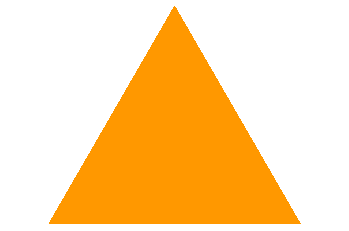

In [57]:
draw_pdf_contours(IGR())

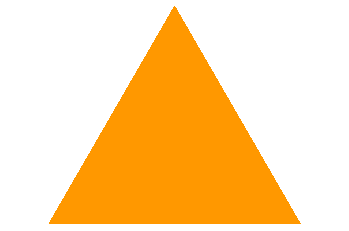

In [58]:
draw_pdf_contours(IGR(mu = np.array([1,0,0])))

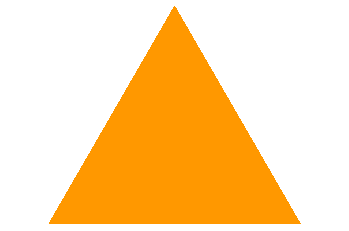

In [60]:
draw_pdf_contours(IGR(mu = np.array([1,0,0]), sigma = np.array([[10,0,0], 
                                                                [0,5,0], 
                                                                [0,0,0.5]])))